In [37]:
import polars as pl
import pandas as pd
import numpy as np 
import pycountry

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pl.read_csv("/Users/kurmangazykarabekov/Desktop/собесы/12Go Asia/data.csv")

In [3]:
data.head(2)

bid,channel,createdon,cust_name,date_of_birth,email,email_domain_score,email_score,godate,insurance_flg,ip,isFraud,nationality,netprice_thb,p_attempts,paidon,passenger_passport_score,passenger_score,payer_country,payer_name,proxy,recent_abuse,role_id,seats,tor,useragent,usr_name,vehclass_id,vpn
i64,str,str,str,str,str,f64,f64,str,i64,str,i64,str,f64,i64,str,f64,f64,str,str,f64,f64,str,i64,f64,str,str,str,f64
6524445,"""affiliate""","""2021-05-01 00:…","""Tiffany Stephe…","""1999-07-04""","""ryanbrianna@ou…",0.0,10.0,"""2021-07-01 07:…",0,"""213.89.6.2""",0,"""SE""",115.0,0,"""2021-06-29 16:…",0.0,0.0,"""SE""","""Tiffany Stephe…",null,null,"""user""",1,null,"""Phone,sv,SEK""","""Tiffany Stephe…","""van""",null
5800338,"""affiliate""","""2021-05-01 00:…","""Amanda Cooper""","""2002-06-07""","""dustin85@gmail…",0.0,10.0,"""2021-05-29 13:…",1,"""124.106.133.17…",0,"""TH""",985.180176,0,"""2021-05-25 03:…",0.0,0.0,"""NU""",null,0.0,0.0,"""user""",1,0.0,"""Phone,en,PHP""","""Amanda Cooper""","""avia""",0.0


In [4]:
data = (
    data.with_columns(
        pl.col("createdon").str.strptime(
            pl.Datetime,
            format="%Y-%m-%d %H:%M:%S%z",
        )
    )
    .with_columns(
        pl.col("date_of_birth").str.strptime(
            pl.Datetime,
            format="%Y-%m-%d",
        )
    )
    .with_columns(
        pl.col("godate").str.strptime(
            pl.Datetime,
            format="%Y-%m-%d %H:%M:%S%z",
        )
    )
    .with_columns(
        pl.col("paidon").str.strptime(
            pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f%z", strict=False
        )
    )
)

/var/folders/l9/p8dmtkcx40g8jtfzctxzg4km0000gn/T/ipykernel_5670/1798036012.py:21: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("paidon").str.strptime(


In [5]:
data = data.sort("createdon", descending=False)

In [6]:
data.head(2)

bid,channel,createdon,cust_name,date_of_birth,email,email_domain_score,email_score,godate,insurance_flg,ip,isFraud,nationality,netprice_thb,p_attempts,paidon,passenger_passport_score,passenger_score,payer_country,payer_name,proxy,recent_abuse,role_id,seats,tor,useragent,usr_name,vehclass_id,vpn
i64,str,"datetime[μs, UTC]",str,datetime[μs],str,f64,f64,"datetime[μs, UTC]",i64,str,i64,str,f64,i64,"datetime[ns, UTC]",f64,f64,str,str,f64,f64,str,i64,f64,str,str,str,f64
6524445,"""affiliate""",2021-04-30 17:21:17 UTC,"""Tiffany Stephe…",1999-07-04 00:00:00,"""ryanbrianna@ou…",0.0,10.0,2021-07-01 00:30:00 UTC,0,"""213.89.6.2""",0,"""SE""",115.0,0,2021-06-29 09:57:12.000177348 UTC,0.0,0.0,"""SE""","""Tiffany Stephe…",null,null,"""user""",1,null,"""Phone,sv,SEK""","""Tiffany Stephe…","""van""",null
5800338,"""affiliate""",2021-04-30 17:30:19 UTC,"""Amanda Cooper""",2002-06-07 00:00:00,"""dustin85@gmail…",0.0,10.0,2021-05-29 06:35:00 UTC,1,"""124.106.133.17…",0,"""TH""",985.180176,0,2021-05-24 20:58:15.000692073 UTC,0.0,0.0,"""NU""",null,0.0,0.0,"""user""",1,0.0,"""Phone,en,PHP""","""Amanda Cooper""","""avia""",0.0


In [7]:
print(f"Unique count users{data.select(pl.col('bid').n_unique())}")
print(f"Count users{data.select(pl.col('bid').count())}")

Unique count usersshape: (1, 1)
┌─────────┐
│ bid     │
│ ---     │
│ u32     │
╞═════════╡
│ 2376692 │
└─────────┘
Count usersshape: (1, 1)
┌─────────┐
│ bid     │
│ ---     │
│ u32     │
╞═════════╡
│ 3464222 │
└─────────┘


In [48]:
(
    data.group_by("channel")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

channel,sum_isFraud,total_transactions,fraud_rate
str,i64,u32,f64
"""direct""",2402,435377,0.551706
"""organic""",1860,542862,0.342629
"""affiliate""",1549,863866,0.17931
"""paid""",1040,1077484,0.096521
"""referral""",307,152190,0.201722
"""unknown""",304,263770,0.115252
null,277,118148,0.234452
"""email""",86,10505,0.818658
"""partner""",0,20,0.0


In [9]:
(
    data
    .group_by("bid")
    .agg(pl.sum("isFraud").alias("sum_isFraud"))
    .filter(pl.col("sum_isFraud") > 0)
    .sort("sum_isFraud", descending=True)
    )

bid,sum_isFraud
i64,i64
9645298,2
9563557,2
7002793,2
5787013,2
7012199,2
9607089,2
7653251,2
9109516,2
6062171,2


In [10]:
(
    data.group_by("insurance_flg")
    .agg(pl.sum("isFraud").alias("sum_isFraud"))
    .sort("sum_isFraud", descending=True)
)

insurance_flg,sum_isFraud
i64,i64
0,4254
1,3571


In [11]:
(
    data.group_by("payer_country")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

payer_country,sum_isFraud,total_transactions,fraud_rate
str,i64,u32,f64
"""NU""",3395,1344799,0.252454
"""US""",1680,117571,1.428924
"""CA""",433,49159,0.880815
"""JP""",300,31715,0.945925
"""AT""",202,31923,0.632773
"""DE""",195,271934,0.071709
"""GB""",171,244118,0.070048
"""AU""",147,86740,0.169472
"""FR""",125,228024,0.054819


In [14]:
def convert_iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

In [12]:
fraud_by_country = (
    data.group_by("payer_country")
    .agg(pl.sum("isFraud").alias("sum_isFraud"), pl.count().alias("total_transactions"))
    .sort("sum_isFraud", descending=True)
).to_pandas()

In [13]:
fraud_by_country["fraud_rate"] = (
    fraud_by_country["sum_isFraud"] / fraud_by_country["total_transactions"] * 100
)

In [15]:
fraud_by_country["iso3"] = fraud_by_country["payer_country"].apply(convert_iso2_to_iso3)

In [18]:
fraud_by_country

,payer_country,sum_isFraud,total_transactions,fraud_rate,iso3
0,NU,3395,1344799,0.252454,NIU
1,US,1680,117571,1.428924,USA
2,CA,433,49159,0.880815,CAN
3,JP,300,31715,0.945925,JPN
4,AT,202,31923,0.632773,AUT
...,...,...,...,...,...
193,NR,0,1,0.000000,NRU
194,YT,0,1,0.000000,MYT
195,ZW,0,17,0.000000,ZWE
196,KI,0,3,0.000000,KIR


In [22]:
fig = px.choropleth(
    fraud_by_country,
    locations="iso3", 
    locationmode="ISO-3",
    color="sum_isFraud",
    hover_name="payer_country",
    hover_data=[
        "total_transactions",
        "fraud_rate",
    ],
    color_continuous_scale="Reds",
    title="Distribution of Fraudulent Transactions by Country",
)

In [49]:
fig.update_layout(
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular",
        showland=True,
        landcolor="lightgray",
        showocean=True,
        oceancolor="lightblue",
    ),
    width=1000,
    height=600,
)

fig.show()

In [25]:
(
    data.group_by("vehclass_id")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

vehclass_id,sum_isFraud,total_transactions,fraud_rate
str,i64,u32,f64
"""avia""",3870,178673,2.165968
"""bus""",1804,1346000,0.134027
"""ferry""",1034,1009565,0.10242
"""train""",837,637773,0.131238
"""van""",164,219223,0.07481
"""charter""",94,68739,0.136749
"""insurance""",22,4235,0.519481
"""railpass""",0,9,0.0
"""daytrip""",0,4,0.0


<AxesSubplot: >

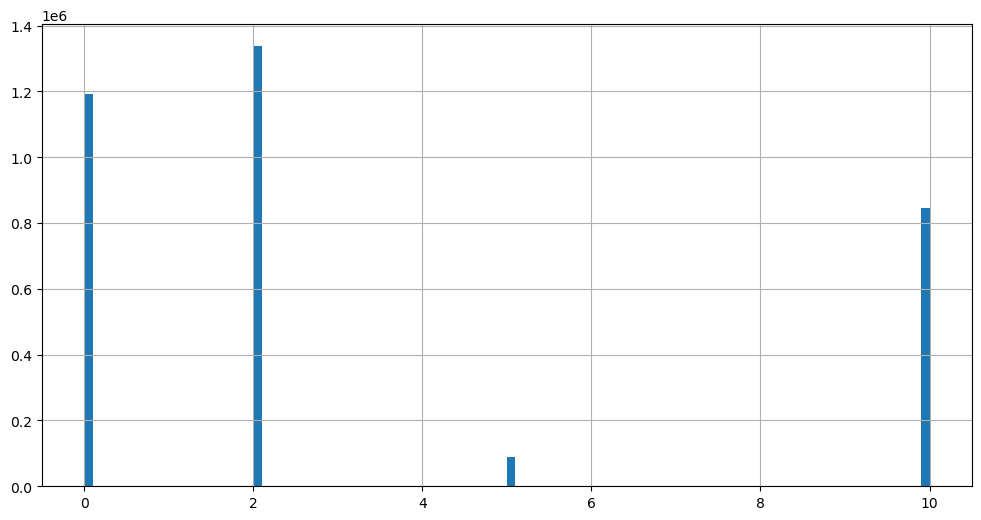

In [28]:
data["email_score"].to_pandas().hist(bins=100, figsize=(12, 6))

In [39]:
data["netprice_thb"].to_pandas().apply(lambda x: np.log(x+1))

/var/folders/l9/p8dmtkcx40g8jtfzctxzg4km0000gn/T/ipykernel_5670/524640316.py:1: RuntimeWarning:

invalid value encountered in log



0          4.753590
1          6.893839
2          7.783641
3          6.018593
4          6.353566
             ...   
3464217    7.048386
3464218    4.680470
3464219    7.680731
3464220    5.602119
3464221    6.552508
Name: netprice_thb, Length: 3464222, dtype: float64

/var/folders/l9/p8dmtkcx40g8jtfzctxzg4km0000gn/T/ipykernel_5670/496005933.py:1: RuntimeWarning:

invalid value encountered in log

/Users/kurmangazykarabekov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



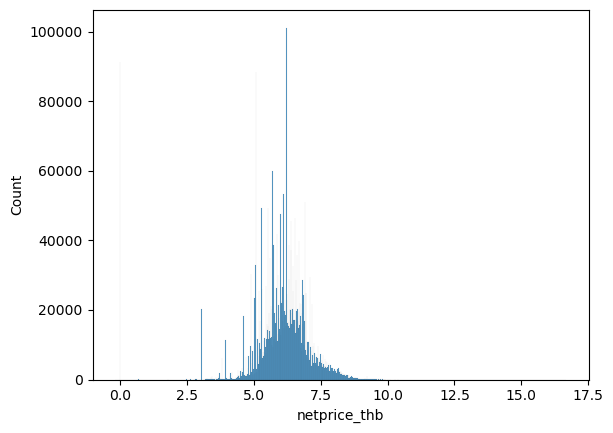

In [43]:
sns.histplot(data["netprice_thb"].to_pandas().apply(lambda x: np.log(x + 1)))
plt.show()

In [45]:
(
    data.group_by("recent_abuse")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

recent_abuse,sum_isFraud,total_transactions,fraud_rate
f64,i64,u32,f64
0.0,3334,1276993,0.261082
1.0,3052,478748,0.637496
null,1439,1708481,0.084227


In [46]:
(
    data.group_by("proxy")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

proxy,sum_isFraud,total_transactions,fraud_rate
f64,i64,u32,f64
1.0,4566,1036073,0.440703
0.0,1820,719668,0.252894
null,1439,1708481,0.084227
